In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

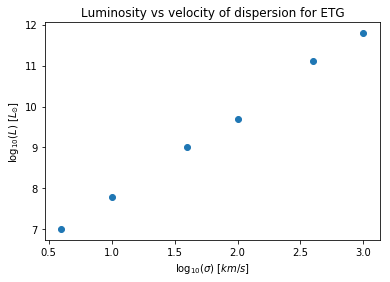

In [19]:
# Data right plot of Figure 7 
#https://iopscience.iop.org/article/10.3847/1538-4357/aa6540/pdf
log_sigma = [0.6, 1., 1.6, 2., 2.6, 3.]
log_lum = [7, 7.8, 9., 9.7, 11.1, 11.8]
plt.figure()
plt.title('Luminosity vs velocity of dispersion for ETG')
plt.xlabel(u'$\log_{10}({\sigma})\ [km/s]$')
plt.ylabel(u'$\log_{10}({L})\ [L_{\odot}]$')
plt.scatter(log_sigma, log_lum)
plt.show()

In [20]:
coefficients = np.polyfit(log_sigma, log_lum, 1)
print( 'a =', coefficients[0]) #Slope
print( 'b =', coefficients[1]) #Intercept

a = 2.014150943396226
b = 5.774528301886793


In [21]:
# Faber-Jackson relation from the papper:
def luminosity_function(sigma):
    a, b = 2.01, 5.77 #slope and intercept for V-band
    L = 10**(a*np.log10(sigma) + b)
    return L #in solar luminosities

In [22]:
# Uploading data from SLAC sample
data = pd.read_csv('data.csv',delimiter='\t',encoding='utf-8')
data.head()

,SDSS,Plate,MJD,Fiber,zFG,zBG,Imag,n_Imag,AI,Name,...,PA,sigma,e_sigma,Mph,Mul,Lens,n_Lens,Sloan,_RA,_DE
0,000802.96-000408.2,669,52559,156,0.4400,1.1924,18.65,d,0.12,J0008-0004,...,27.3,,,E,S,A,,Sloan,2.01233,-0.06894
1,002817.87-092934.3,653,52145,590,0.0565,0.7146,13.75,s,0.07,J0028-0929,...,78.9,147,7,L,S,X,,Sloan,7.07446,-9.49286
2,002907.77-005550.5,391,51782,88,0.2270,0.9313,17.09,d,0.04,J0029-0055,...,26.6,229,18,E,S,A,,Sloan,7.28237,-0.93069
3,003753.21-094220.1,655,52162,392,0.1955,0.6322,16.26,s,0.06,J0037-0942,...,11.4,279,14,E,S,A,,Sloan,9.47171,-9.70558
4,004402.90+011312.6,393,51794,456,0.1196,0.1965,15.73,s,0.04,J0044+0113,...,151.3,266,13,E,S,A,,Sloan,11.01208,1.22017


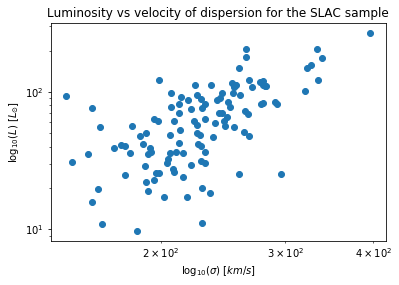

In [36]:
luminosity, velocity = [], []
for index, row in data.iterrows():
    L, sigma = row['L(V555)'], row['sigma']
    if(L !='   ' and sigma !='   '):
        L, sigma = float(L), float(sigma)
        luminosity.append(L)
        velocity.append(sigma)
plt.figure()
plt.scatter(velocity, luminosity)
plt.title('Luminosity vs velocity of dispersion for the SLAC sample')
plt.xlabel(u'$\log_{10}({\sigma})\ [km/s]$')
plt.ylabel(u'$\log_{10}({L})\ [L_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.show()